In [21]:
import tensorflow as tf
import os
import sys 

In [22]:
base_dir = 'dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_real_money_dir = os.path.join(train_dir, 'real')
train_fake_money_dir = os.path.join(train_dir, 'fake')

test_real_money_dir = os.path.join(test_dir, 'real')
test_fake_money_dir = os.path.join(test_dir, 'fake')


In [23]:
BATCH_SIZE = 4
TRAIN_SIZE = 90
TEST_SIZE = 10

In [24]:
model = tf.keras.models.Sequential(
    [
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 

    tf.keras.layers.Dense(1, activation='sigmoid')  
]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen  = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 90 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [26]:
history = model.fit(train_generator,
                    steps_per_epoch=TRAIN_SIZE / BATCH_SIZE,
                    epochs=15, 
                    validation_data=test_generator, 
                    validation_steps=TEST_SIZE / BATCH_SIZE, 
                    verbose=2)

Epoch 1/15
22/22 - 6s - loss: 1.1045 - accuracy: 0.5222 - val_loss: 0.6414 - val_accuracy: 1.0000 - 6s/epoch - 258ms/step
Epoch 2/15
22/22 - 4s - loss: 0.4138 - accuracy: 0.9111 - val_loss: 0.1199 - val_accuracy: 1.0000 - 4s/epoch - 157ms/step
Epoch 3/15
22/22 - 4s - loss: 0.2318 - accuracy: 0.9444 - val_loss: 0.0097 - val_accuracy: 1.0000 - 4s/epoch - 157ms/step
Epoch 4/15
22/22 - 4s - loss: 0.1934 - accuracy: 0.9778 - val_loss: 0.1195 - val_accuracy: 0.9000 - 4s/epoch - 157ms/step
Epoch 5/15
22/22 - 4s - loss: 0.1283 - accuracy: 0.9667 - val_loss: 0.0287 - val_accuracy: 1.0000 - 4s/epoch - 165ms/step
Epoch 6/15
22/22 - 4s - loss: 0.0507 - accuracy: 0.9889 - val_loss: 0.1052 - val_accuracy: 0.9000 - 4s/epoch - 157ms/step
Epoch 7/15
22/22 - 4s - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.2097 - val_accuracy: 0.9000 - 4s/epoch - 159ms/step
Epoch 8/15
22/22 - 4s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0349 - val_accuracy: 1.0000 - 4s/epoch - 156ms/step
Epoch 9/15
22/22 - 4s - 

Text(0.5, 1.0, 'Loss in training and validation')

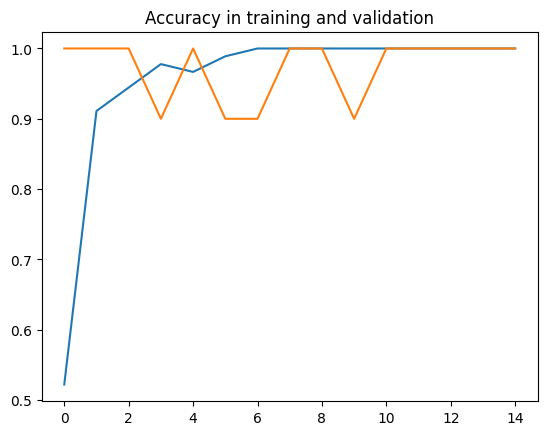

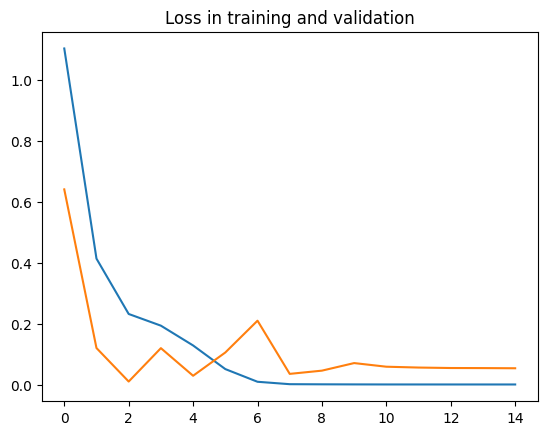

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 


# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image


# prediction on the uploaded image
img = image.load_img('./sample.jpg', target_size=(150, 150)) # let's use load_img to scale it 

# scaling process
x = image.img_to_array(img)
x /= 255 
x = np.expand_dims(x, axis=0)
# flatten the output
images = np.vstack([x])

# prediction!
classes = model.predict(images, batch_size=10)

print(classes[0])

if classes[0] > 0.5:
  print("real!")
else:
  print("fake!")

1/1 [==============================] - 0s 84ms/step
[0.98220336]
real!
